En este ejercicio, de nuevo, trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V, ese en el que habíamos unido distintos csv en uno.



1. Usando la librería seaborn, crea una gráfica de barras que muestre el número de personas que han hecho cada actividad en cada año. Hacedlo solo desde el 2015. Os podrá salir una gráfica un poco fea, no os preocupeis, es lo que esperamos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows=None

In [2]:
df = pd.read_csv('attacks_modificado_3.csv', index_col = 0)

In [3]:
df.head(2)

,unnamed:_0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,6,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,Y,FATAL,03-Jun-2018


In [23]:
# Filtro
df['year'] >= 2015

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
30       True
31       True
32       True
33       True
34       True
35       True
36       True
37       True
38       True
39       True
40       True
41       True
42       True
43       True
44       True
45       True
46       True
47       True
48       True
49       True
50       True
51       True
52       True
53       True
54       True
55       True
56       True
57       True
58       True
59       True
60       True
61       True
62       True
63       True
64       True
65       True
66       True
67       True
68       True
69       True
70       True
71    

In [4]:
df_2015_on = df[df['year'] >= 2015]
df_2015_on.head(2)

,unnamed:_0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,6,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,Y,FATAL,03-Jun-2018


In [5]:
# Comprobación
df_2015_on['year'].unique()

array([2018., 2017., 2016., 2015.])

In [6]:
# Hacemos un group by para ver el número de personas que han hecho cada actividad en cada año.
df_2015_on.groupby(['year', 'activity'])['case_number'].count()

year    activity                
2015.0  Body Boarding                1
        Body boarding                1
        Boogie boarding              1
        Diving                       1
        Floating                     1
        Hand feeding sharks          1
        Kayak Fishing                2
        Paddle boarding              1
        Playing                      1
        Playing in the water         1
        Rowing                       1
        Scallop diving on hookah     1
        Shark fishing                1
        Snorkeling                   2
        Spearfishing                 4
        Stand-Up Paddleboarding      1
        Standing                     1
        Standing / Snorkeling        1
        Surf skiing                  1
        Surf-skiing                  1
        Surfing                     29
        Swimming                     6
        Wading                       7
        Walking                      1
2016.0  Diving                 

In [7]:
# Lo guardamos en un data frame
df_group = pd.DataFrame(df_2015_on.groupby(['year', 'activity'])['case_number'].size()).reset_index()
df_group.head(2)

,year,activity,case_number
0,2015.0,Body Boarding,1
1,2015.0,Body boarding,1


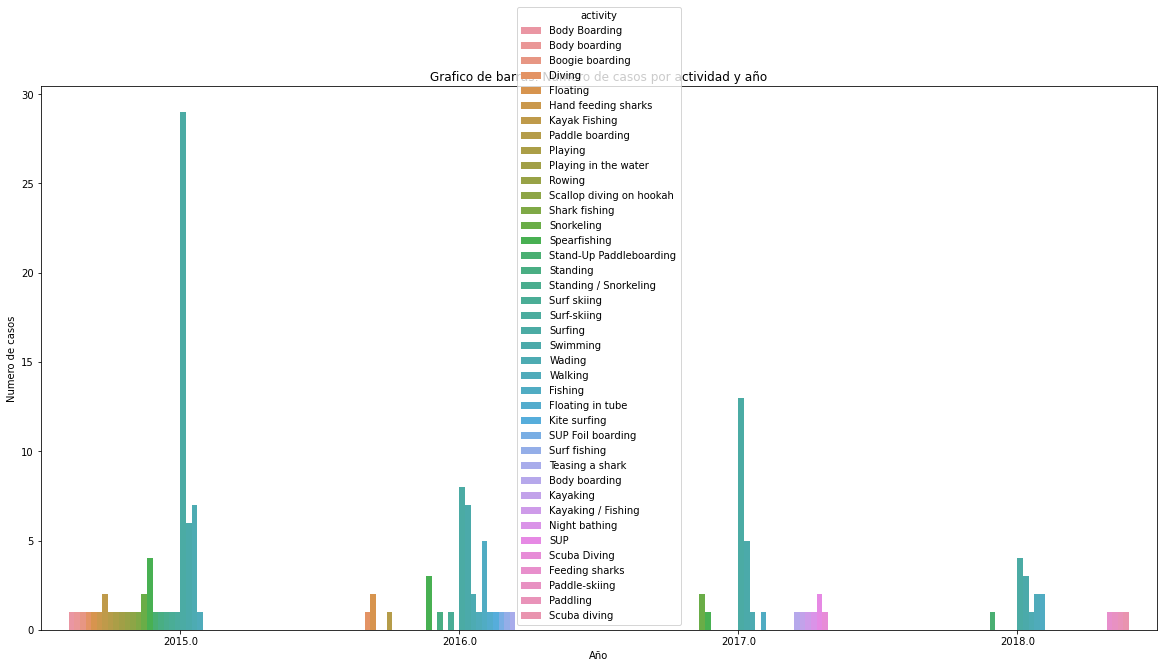

In [8]:
# Hacemos la gráfica
plt.figure(figsize=(20,10))
fig = sns.barplot(x='year', y='case_number', data= df_group, hue= 'activity')
fig.set(xlabel='Año', ylabel= 'Numero de casos')
fig.set_title('Grafico de barras: Numero de casos por actividad y año')
plt.show()

> En este gráfico podemos ver cuántos ataques han habido a **partir del `2015`**. Los colores nos indican la actividad que estaban realizando cuando les atacó un tiburón.
>
>Las **actividades** que más se practicaron a la hora del ataque fueron **`surf-skiing`, `surfing` y `swimming`**.

2. Usando la librería seaborn, crea una gráfica de barras que muestre el número de ataques que han ocurrido cada año en función del sexo. Hacedlo solo desde el 2015.

In [10]:
df_group2 = pd.DataFrame(df_2015_on.groupby(['year', 'sex_'])['case_number'].count()).reset_index()
df_group2

,year,sex_,case_number
0,2015.0,F,12
1,2015.0,M,56
2,2016.0,F,7
3,2016.0,M,30
4,2017.0,F,9
5,2017.0,M,21
6,2018.0,F,2
7,2018.0,M,15


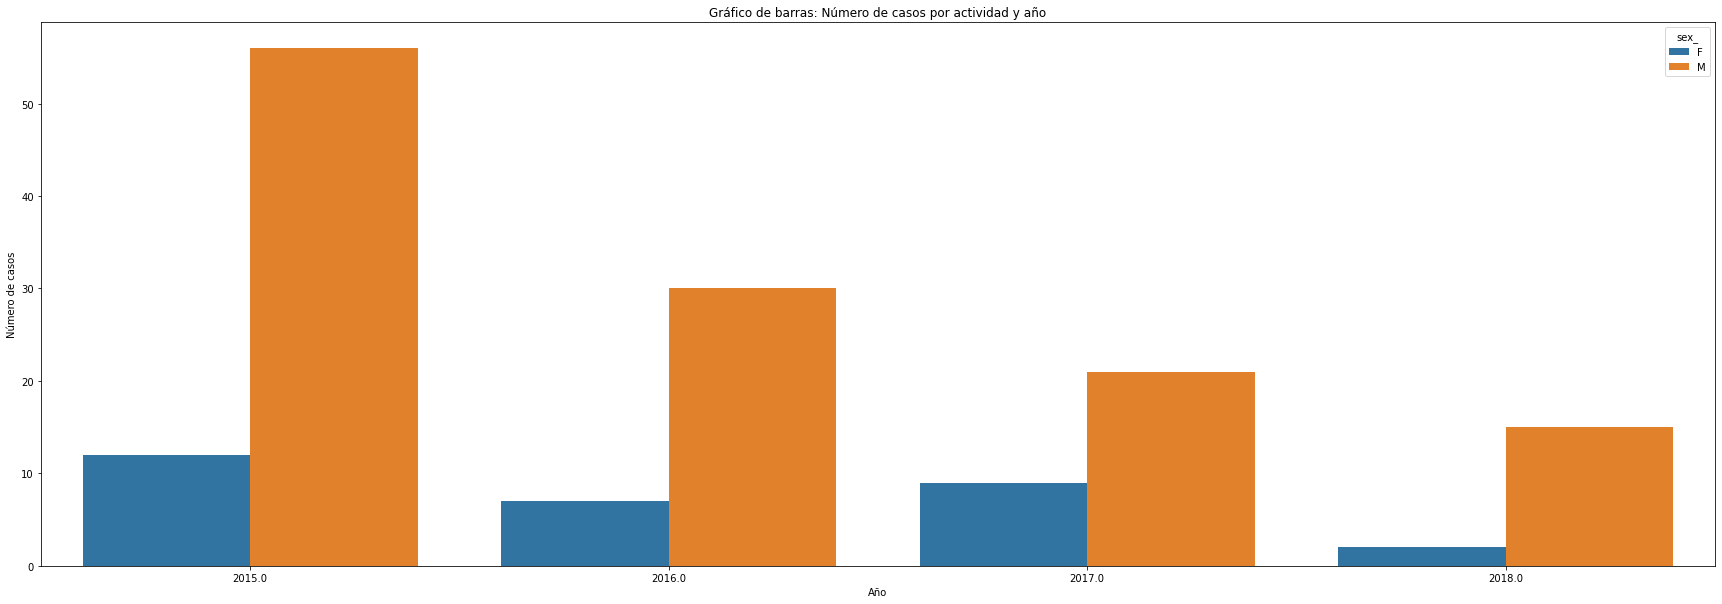

In [11]:
# Nos damos cuenta de que con el countplot no necesitábamos haber hecho el group by

plt.figure(figsize=(30,10))
fig = sns.countplot(x='year', data= df_2015_on, hue= 'sex_')
fig.set(xlabel='Año', ylabel= 'Número de casos')
fig.set_title('Gráfico de barras: Número de casos por actividad y año')
plt.show()

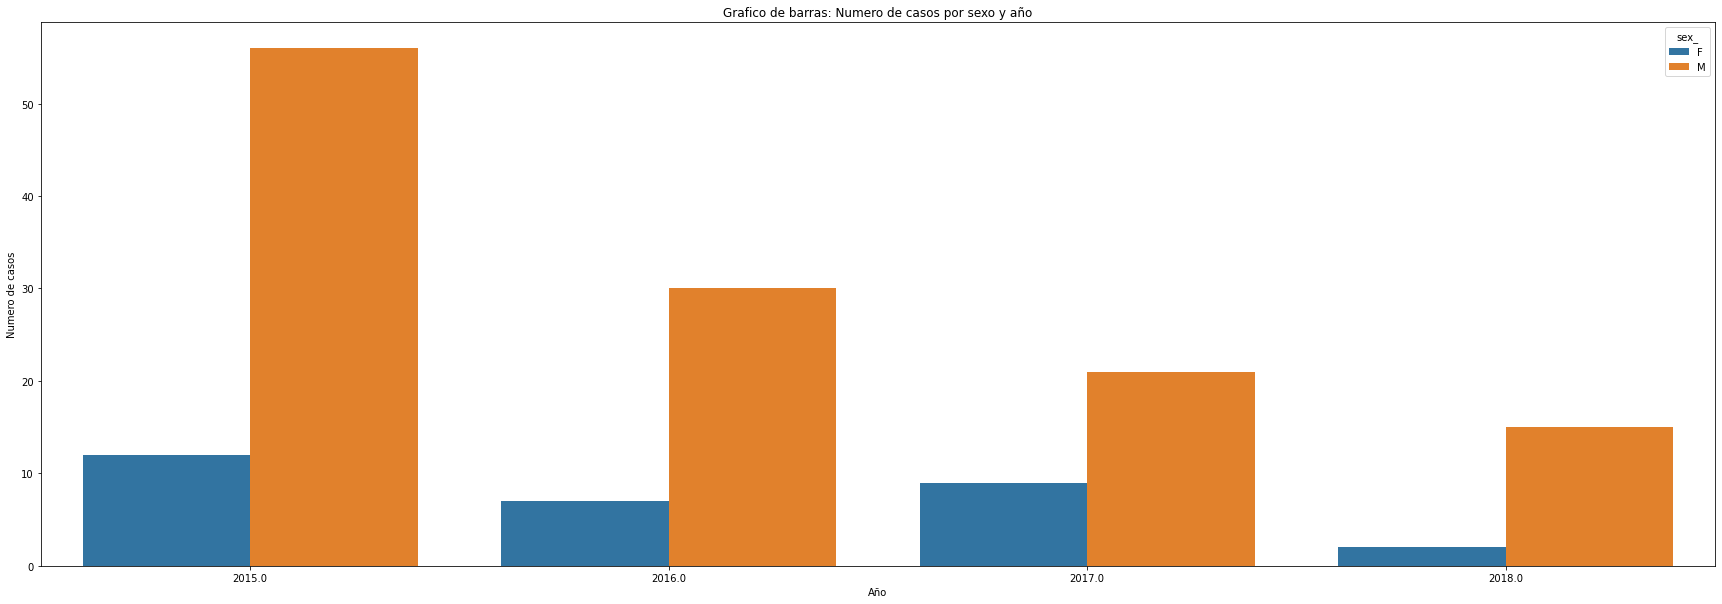

In [12]:
# Group by + Barplot == Countplot (Comprobación)
plt.figure(figsize=(30,10))
fig = sns.barplot(x='year', y='case_number', data= df_group2, hue= 'sex_')
fig.set(xlabel='Año', ylabel= 'Numero de casos')
fig.set_title('Grafico de barras: Numero de casos por sexo y año')
plt.show()

> Con esta gráfica vemos que **en la mayor parte de los casos, las víctimas son hombres**.
>
> Destaca el año `2015` en número de casos.

3. ¿Cuántos ataques hubo por año? Seleccionad solo desde el año 1500.

In [13]:
df_1500_on= df[df['year']>=1500]

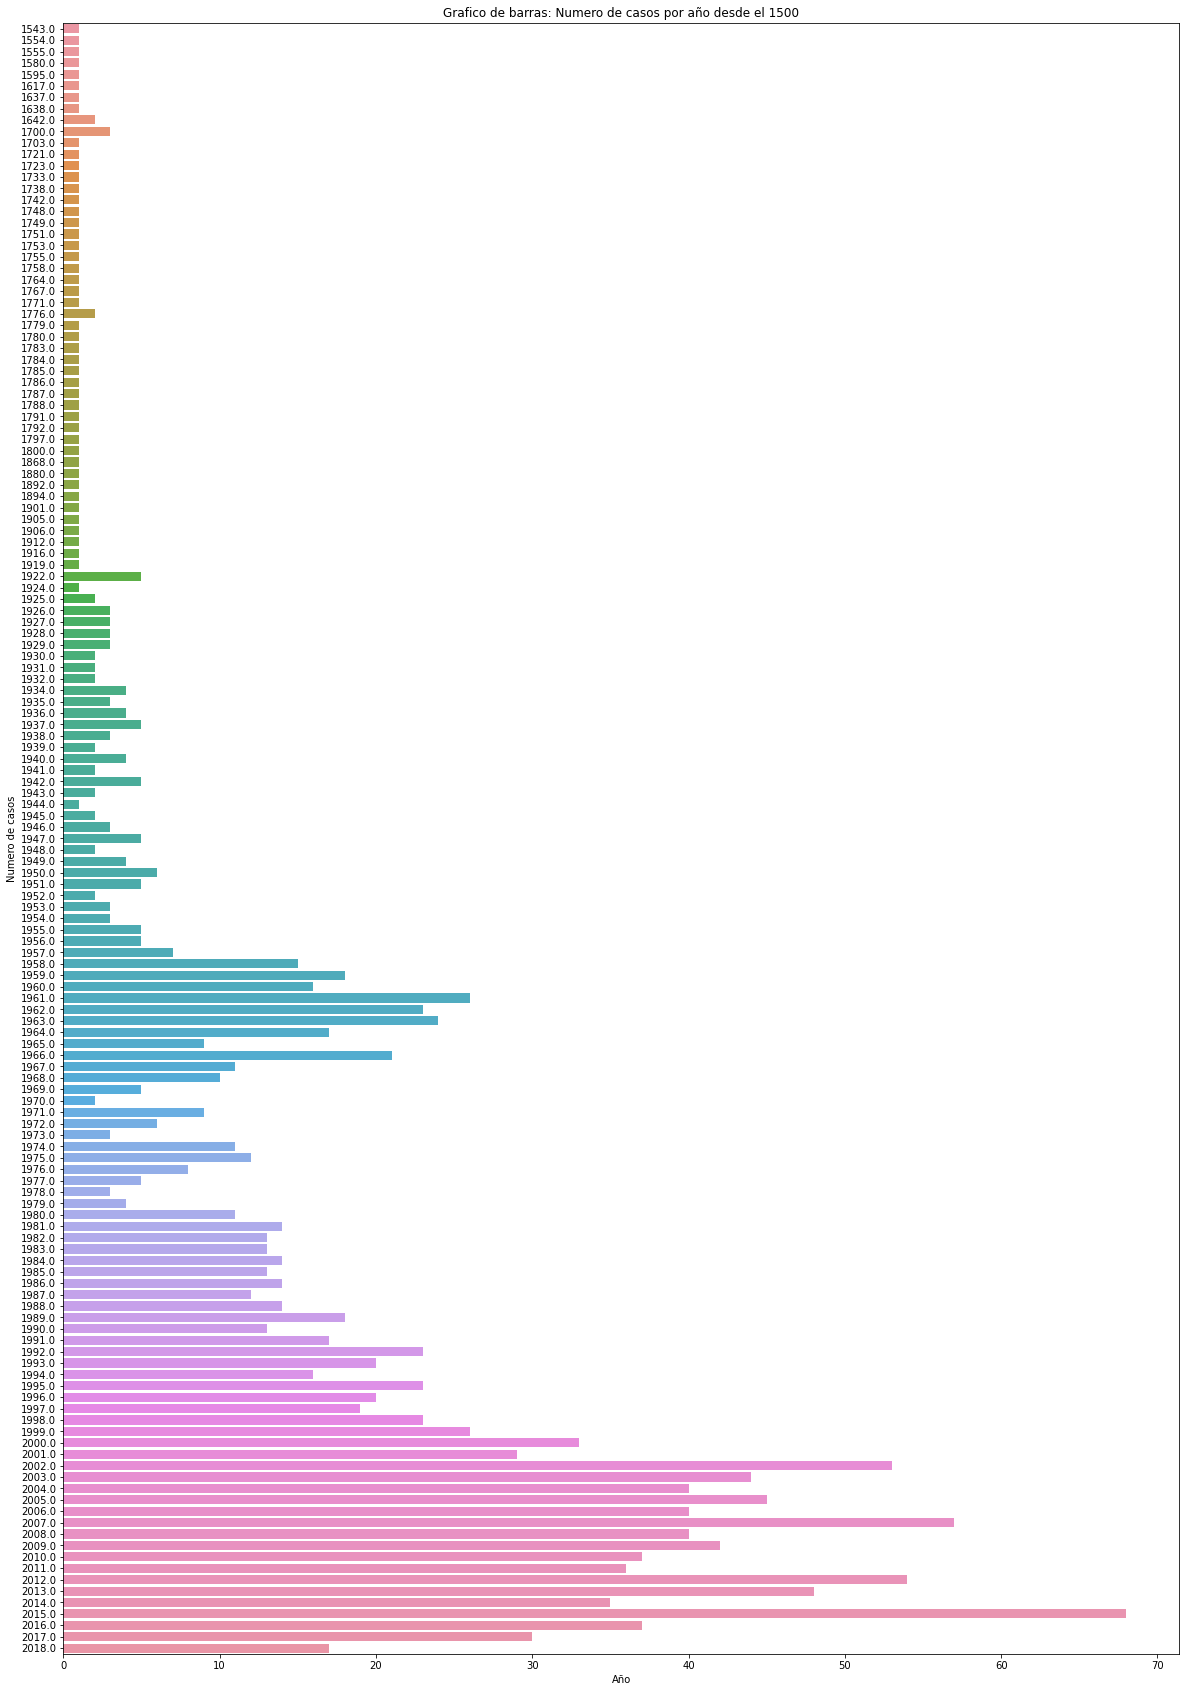

In [14]:
plt.figure(figsize=(20,30))
fig = sns.countplot(y='year', data= df_1500_on)
fig.set(xlabel='Año', ylabel= 'Numero de casos')
fig.set_title('Grafico de barras: Numero de casos por año desde el 1500')
plt.show()

> Vemos que el **numero de casos** (o el registro de los mismos) **lleva aumentando drásticamente desde `1957`**, **especialmente** `a partir de 1980`. 
>
>Probablemente sea a partir de esa fecha que se han registrado la mayor parte de los casos en este estudio.

4. Seleccionad solo los registros de USA, AUSTRALIA y SOUTH AFRICA. Muestra el número de ataques por país y año desde el año 1900.

In [19]:
df_pais = df[(df['country'].isin(['USA', 'AUSTRALIA', 'SOUTH AFRICA'])) & (df['year'] >= 1900)] 
df_pais.head(2)

,unnamed:_0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
2,8,2018.05.26.b,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,N,Lower left leg bitten,26-May-2018


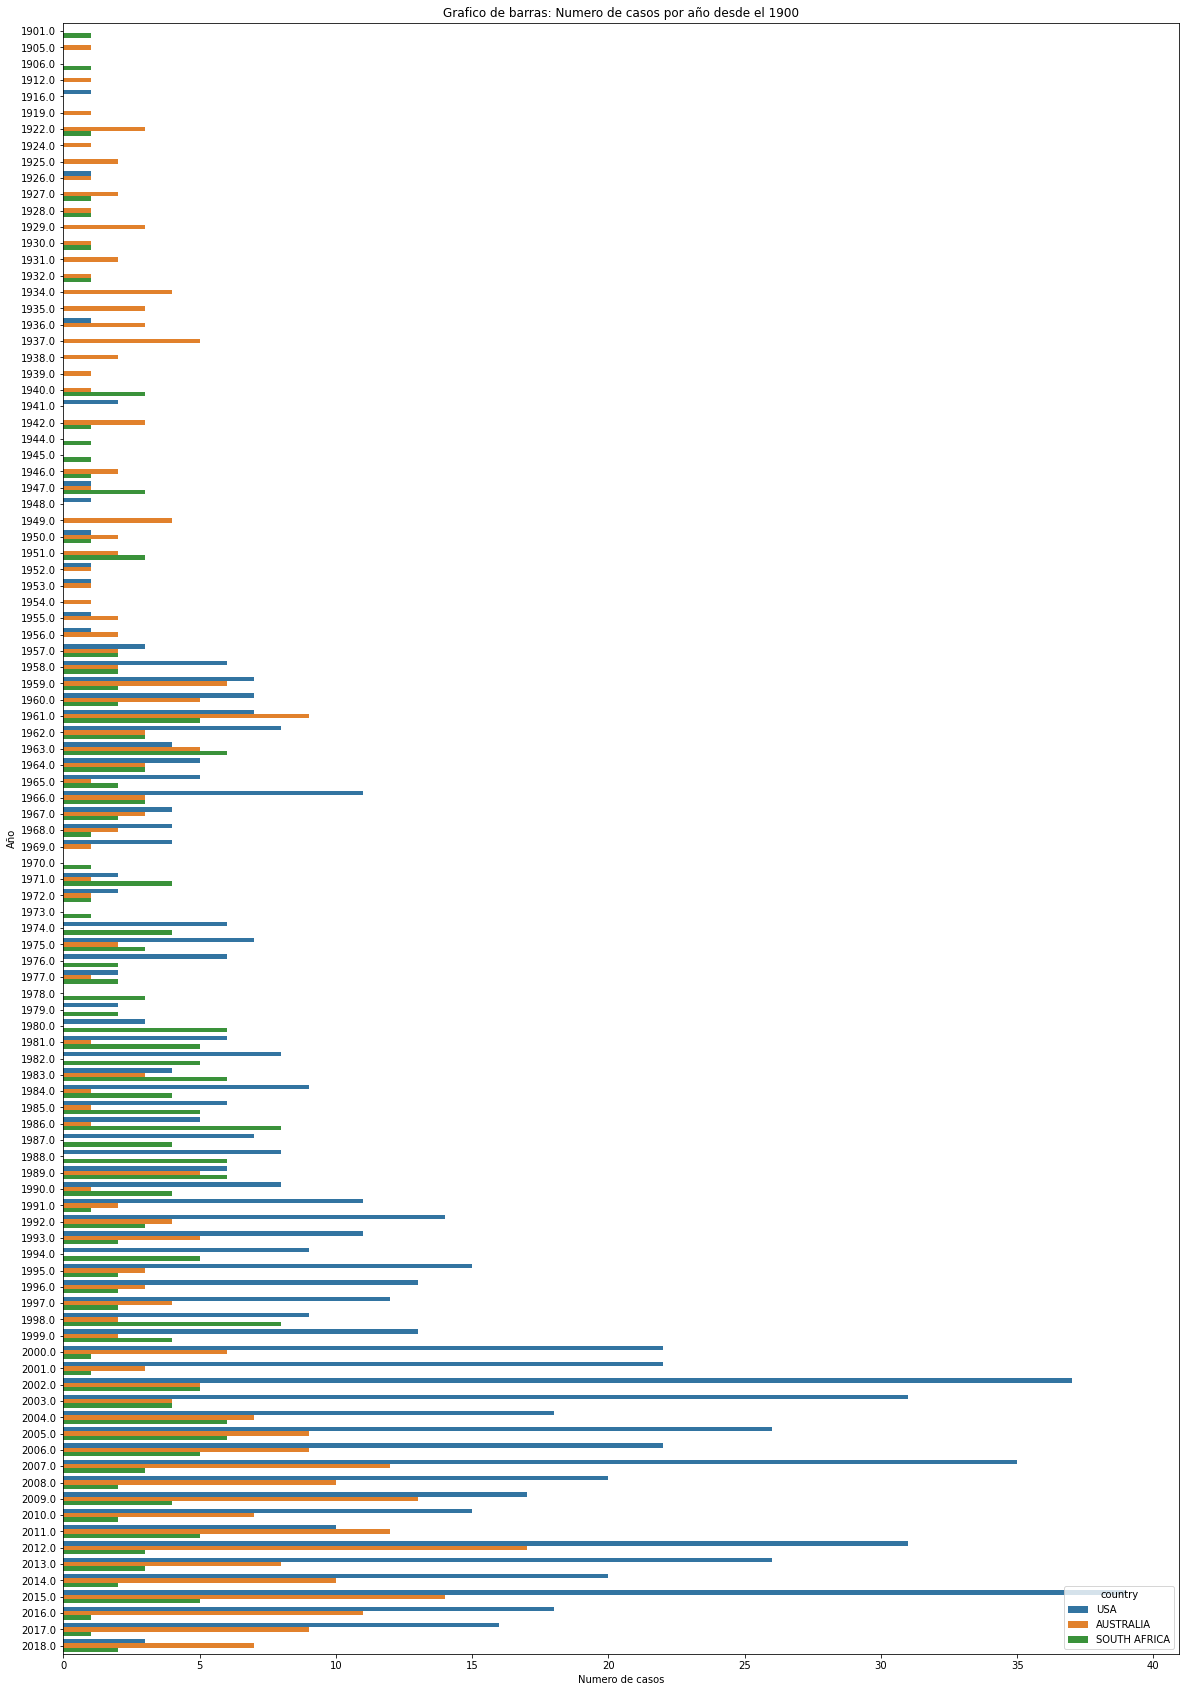

In [16]:
plt.figure(figsize=(20,30))
fig = sns.countplot(y='year', data= df_pais, hue= 'country')
fig.set(xlabel= 'Número de casos', ylabel='Año' )
fig.set_title('Gráfico de barras: Número de casos por año desde el 1900')
plt.show()

> Vemos el número de casos por año y país.
> * En el caso de **USA**, el número de casos (o el registro de los mismos en este conjunto de datos) lleva aumentando desde `1991`.
> * **USA es el país que más casos de ataques de tiburón experimenta**, o el que más los reporta, seguido de **Australia**, que ha aumentado sus casos desde el `2000`.
> * Los casos en **South Africa** se mantienen en la misma línea desde `1957`, aunque tiene dos picos, uno en `1986` y otro en `1998`.

5. Realizad un boxplot donde se muestre los principales estadísticos del número de ataques por país.

In [17]:
# Agrupamos por país para poder hacer un conteo de casos

df_ataques_pais = df.groupby(['country'])['case_number'].count().reset_index()
df_ataques_pais.head(2)

,country,case_number
0,AMERICAN SAMOA,2
1,ARGENTINA,1


In [20]:
# Miramos los principales estadísticos para poder comparar con nuestro boxplot

df_describe = df_ataques_pais.describe().reset_index()
df_describe

,index,case_number
0,count,95.000000
1,mean,17.494737
2,std,86.038818
3,min,1.000000
4,25%,1.000000
5,50%,2.000000
6,75%,4.000000
7,max,741.000000


In [ ]:
# El boxplot de por sí nos saca los siguientes cálculos estadísticos:
# - El máximo y el mínimo
# - La mediana
# - El rango intercuartílico (donde se encuentran la mayoría de los valores)

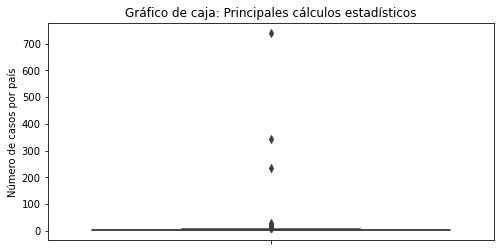

In [28]:
plt.figure(figsize =(8,4))
fig = sns.boxplot(y ='case_number', data = df_ataques_pais)
fig.set(ylabel= 'Número de casos por país')
fig.set_title('Gráfico de caja: Principales cálculos estadísticos')
plt.show()

In [ ]:
# Vemos que hay unos cuantos outliers que nos impiden ver la mayoría, así que vamos a limitar el eje y

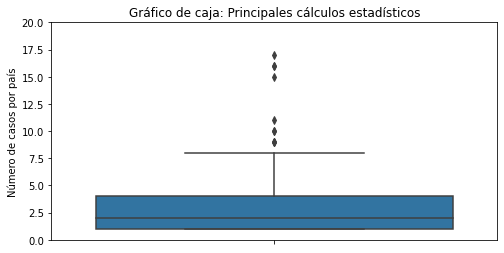

In [31]:
# Probamos el rango de ylim hasta que vemos el rango intercuartílico

plt.figure(figsize =(8,4))
fig = sns.boxplot(y ='case_number', data = df_ataques_pais)
fig.set(ylabel= 'Número de casos por país')
fig.set_ylim([0,20])
fig.set_title('Gráfico de caja: Principales cálculos estadísticos')
plt.show()

>Vemos que la mayoría de los países tienen un **total de ataques entre `1` y `5`** aproximadamente ((q3 = 5 )- (q1 = 1) == riq)
>* La **mediana** de numero de casos es de aproximadamente `2.5` (q2)
>* El **máximo** está por encima de los `700` (vemos en el df_describe que el máximo son 741)
>* El **mínimo** es `1`

In [ ]:
# Y los países que se salen del rango, los outliers, son:


In [34]:
df_ataques_pais[df_ataques_pais['case_number'] > 7]

,country,case_number
3,AUSTRALIA,343
4,BAHAMAS,29
9,BRAZIL,16
21,EGYPT,9
25,FIJI,10
27,FRENCH POLYNESIA,9
29,GREECE,8
40,ITALY,11
54,MEXICO,15
56,MOZAMBIQUE,9


In [ ]:
# Todos los demás países tienen como máximo 7 casos